##### The scikit-learn diabetes dataset contains 442 diabetes patients and 10 baseline variables. Age, sex, Body mass index, average blood pressure,Six blood serum measurements (total cholesterol, low-density lipoproteins, high-density lipoproteins, total cholesterol/HDL, possibly log of serum triglycerides level, and blood sugar level). 
---
#### The target variable is a quantitative measure of disease progression one year after the baseline measurement. 
---

#### Is a target variable always present in scikit datasets or is it just an occurence in this dataset.

#### Datasets that are meant for supervised learning tasks always have a target variable present. The target variable is what we are trying to predict. 

#### Unsupervised learning datasets do not have explit target variables. 
---

#### How does a target variable help us?

#### It is the most important aspect of a supervised learning dataset. It gives us a value that we should be aiming for when trying to make a prediction. It behaves as a reference point that the machine should strive to predict.


In [189]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#Utilities to load popular datasets and artificial data generators
from sklearn.datasets import load_diabetes
#Tools for model selection, such as cross validation and hyper-parameter tuning
from sklearn.model_selection import train_test_split
#Score functions, performance metrics, pairwise metrics and distance computations
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Pandas is a library for data manipulation and analysis. 
# It includes DataFrame and Series
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---
# Pandas

- **Pandas** is a library for data manipulation and analysis.** To be more specific, Pandas is a collection of modules where each module is a file containing Python definitions and statements. 

- Pandas comes with **DataFrame**, which is a **two-dimensional labeled data structure with columns of potentially different types**. It provides a organized way to represent tabular data. When data is organized into these DataFrames, it allows us to also use data manipulations methods that come with Pandas.

- Pandas also comes with **Series**, which are **one-dimensional labeled array.** Useful for holding homogeneous data types. DataFrames can be seen as a collection of Series objects that share the same index. Each column in a DataFrame is essentially a Series.
---
# Matplotlib

- **Matplotlib** is a library used for creating static, interactive, and animated visualization in Python. **Matplotlib.pyplot** is a module in Matplotlib that provides MATLAB-like interface for plotting.
---
# Seaborn 

- **Seaborn** is a data visualization library built on top of Matplotlib. Useful in the simplification of complex visualizations like heatmaps, violin plots, distribution plots, etc.
  
---

# NumPy

- **NumPy** is a library for numerical computing in Python. It comes with support for large, multi-dimensional arrays and matrices along side mathematical functions for these arrays. 

---
Libraries provide abstraction. In other words, libraries hide the complex implementations that we do not need to see.


In [190]:
diabetes = load_diabetes()
#feature matrix (called input or independent variables)
X = diabetes.data
# Shape: (442, 10) - 442 patients, 10 features
print(X.shape)
#target vector (called output or dependent variable)
#Shape: (442,) - one target value per patient
#Each entry is a quantitaive measure of disease progression, on a scale of roughly 0-300.
#Trying to predict y using the features in X.
y = diabetes.target

#Creates a pandas DataFrame named df from the NumPy array X, which contains the feature data from the diabtes dataset.
#The columns=diabetes.feature_names arguments assigns meaningful column names to the DataFrame, using the feature names provided by the dataset
df = pd.DataFrame(X, columns=diabetes.feature_names)
#Adds a new column called 'target'
df['target'] = y
#Prints the first 5 rows of the DataFrame, showing all features columns plus the new 'target' column.
print(df.head())
print("\nFirst 5 rows of the dataset")
print(df['target'].head())

(442, 10)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

First 5 rows of the dataset
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


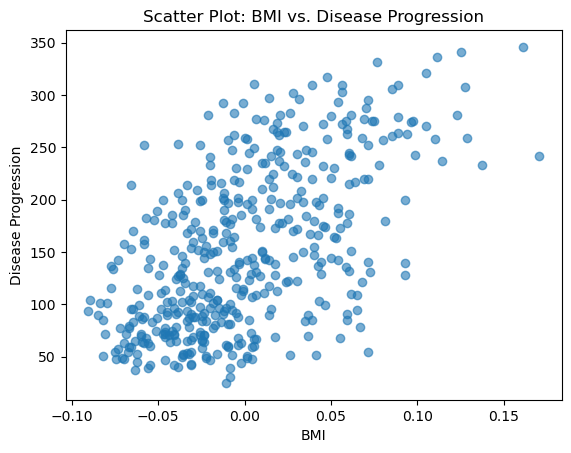

In [191]:
# The scatter function requires two arguments: the x-coordinates and the y-coordinates of the points to be plotted.
# alpha is used to adjust the transparency of the points.
plt.scatter(df['bmi'], df['target'], alpha=0.6)
# Used to place a label in the x-axis
plt.xlabel("BMI")
# Used to place a label in the y-axis
plt.ylabel("Disease Progression")
# Used to place a title in the plot
plt.title("Scatter Plot: BMI vs. Disease Progression")
# After all the plt commands, show is called to display the plot.
plt.show()


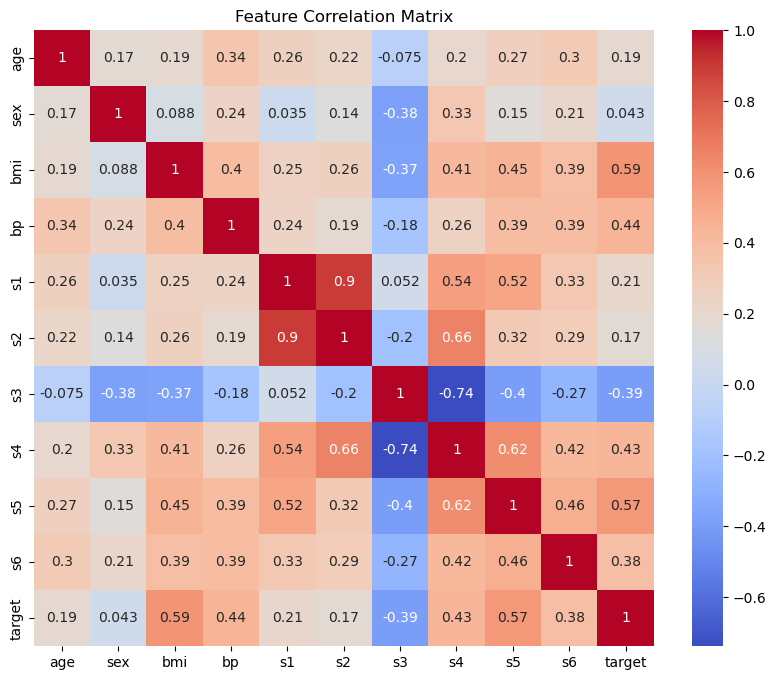

In [192]:
# Creating a correlation matrix

# Figure is used to set the size of the plot
plt.figure(figsize=(10, 8))
# Shows how one feature correlates to another feature.
# Ex: If one feature increases, and another feature also increases, they are positively correlated
corr = df.corr()
# Seaborn is used here to construct a heatmap using the result of the correlation matrix. 
# annot=True means that the values of correlations will be shown in each cell. If this is off, then no numbers will be shown in the heatmap.
# cmap='coolwarm' is used to place the colors that seaborn will use to represent the correlation values.
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
#When plt.show() is called, it displays the plot window that has been created with the functions that came before it, but it also clears the current figure and all of its specifications. . 
plt.show()
# As shown, running the plt.show() function again does not display anything due to the clearing that occured when plt.show() was called above.
plt.show()


The heatmap shows that BMI and S5 are highly linearly correlated to the target variable. We can use both of these as features to improve the predictive capabilities of the model.

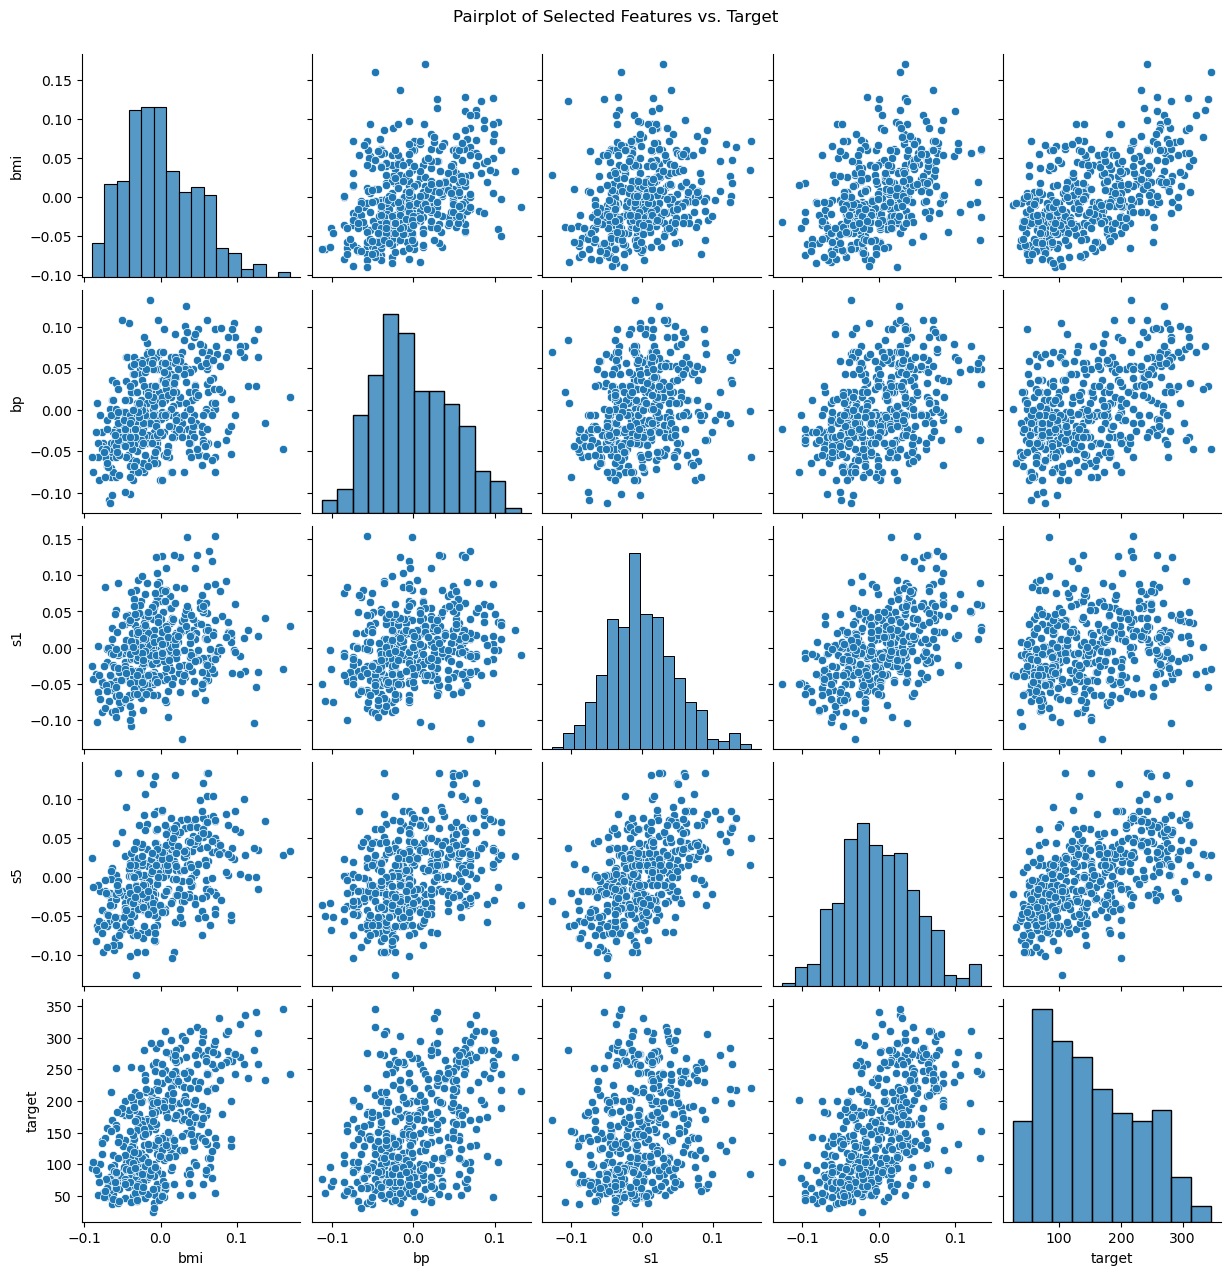

In [193]:
# Pairplot is a seaborn function that creates a grid of scatter plots for each pair of features present in the DataFrame.
sns.pairplot(df[['bmi', 'bp', 's1', 's5', 'target']])
# subtitle sets a super title for the entire figure while title only sets a title for one single plot or axis.
plt.suptitle("Pairplot of Selected Features vs. Target", y=1.02)
plt.show()


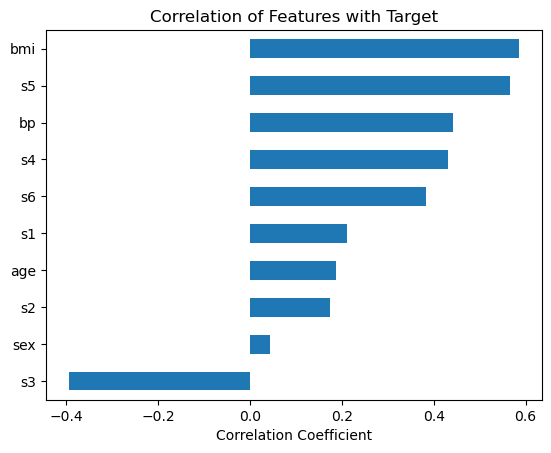

In [194]:
# Similar to when we created the correlation matrix, we can use df.corr() to compute the correlations between features.
# ['target] is placed to select the correlation values between each feature and the target variable. 
# The target variable is removed and the features are sorted.
# One notable difference is that correlation computes the correlation between the target variable and each feature, rather than pairwise that is every variable vs every other variable since it is looking for possible pairs.
correlation = df.corr()['target'].drop('target').sort_values()

# The correlation variable, which holds the correlation coefficients, is used to create a horizontal bar plot. 
# kind indicates what kind of plot will be created.
correlation.plot(kind='barh')
plt.title("Correlation of Features with Target")
plt.xlabel("Correlation Coefficient")
plt.show()


In [195]:
# It is in double brackets to keep it as a DataFrame

# The X indicates a feature matrix for bmi.
X = df[['bp']] 
y = df['target']

# Splitting the dataset into training and testing set.
# test_size=0.2 means that 20% of the data will be used for testing. The remaining 80% is used for training.
# random_state=42 is a seed that allows for reproducibility of the results. Kind of like a Minecraft seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
# Instantiating a model for Linear Regression.
linear_model = LinearRegression()
# .fit is ran to start the training process of the model. Called 'fit' because the model tries to fit its parameters to best match the training data. like fidding the correct pair of jeans that fit the best.
linear_model.fit(X_train, y_train)
# Means to use the model to make predictions on new data
linear_y_pred = linear_model.predict(X_test)
print("Predicted values:", linear_y_pred[:5])



Predicted values: [141.43115752 168.55956993 143.89737683 209.67144584 151.29603476]


In [197]:
# Measures the average squared difference between the predicted values and the actual target values.
# High MSE is bad, low MSE is good.
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_y_pred)
linear_mae = mean_absolute_error(y_test, linear_y_pred)

# Print as markdown-style table
print(f"| Metric    | Value   |")
print(f"| --------- | ------- |")
print(f"| MSE       | {linear_mse:.2f} |")
print(f"| RMSE      | {linear_rmse:.2f} |")
print(f"| R-squared | {linear_r2:.2f} |")
print(f"| MAE       | {linear_mae:.2f} |")

# Higher MSE indicates large errors in the predictions
# Lower RMSE indicates better fit
# Models predictions are off by the result of Root Mean Squared Error
# Shows that the model is off by the result of the Mean Absolute Error
# R-squared is a measure of how well the model explains the variance in the target variable.



| Metric    | Value   |
| --------- | ------- |
| MSE       | 4379.39 |
| RMSE      | 66.18 |
| R-squared | 0.17 |
| MAE       | 57.22 |


### Features: BMI
| Metric    | Value   |
| --------- | ------- |
| MSE       | 4061.83 |
| RMSE      | 63.73   |
| R-squared | 52.26   |
| MAE       | 0.23    |
---
### Features: s6
| Metric    | Value   |
| --------- | ------- |
| MSE       | 4715.16 |
| RMSE      | 68.67   |
| MAE       | 59.43   |
| R-squared | 0.11    |
---
### Features: s5
| Metric    | Value   |
| --------- | ------- |
| MSE       | 3270.59 |
| RMSE      | 57.19   |
| MAE       | 46.20   |
| R-squared | 0.38    |

---
### Features: s4
| Metric    | Value   |
| --------- | ------- |
| MSE       | 4256.21 |
| RMSE      | 65.24   |
| MAE       | 54.71   |
| R-squared | 0.20    |

---
### Features: s3
| Metric    | Value   |
| --------- | ------- |
| MSE       | 4317.35 |
| RMSE      | 65.71   |
| MAE       | 53.96   |
| R-squared | 0.19    |

--- 
### Features: s2
| Metric    | Value   |
| --------- | ------- |
| MSE       | 5060.01 |
| RMSE      | 71.13   |
| MAE       | 61.65   |
| R-squared | 0.04    |

---
### Features: s1
| Metric    | Value   |
| --------- | ------- |
| MSE       | 5003.74 |
| RMSE      | 70.74   |
| MAE       | 61.44   |
| R-squared | 0.06    |

---
### Features: age
| Metric    | Value   |
| --------- | ------- |
| MSE       | 5254.23 |
| RMSE      | 72.49   |
| MAE       | 63.12   |
| R-squared | 0.01    |

---
### Features: bp
| Metric    | Value   |
| --------- | ------- |
| MSE       | 4379.39 |
| RMSE      | 66.18   |
| MAE       | 57.22   |
| R-squared | 0.17    |

---

In [198]:
from sklearn.linear_model import Ridge

features = ['bmi', 's5', 'bp']
X = df[features] 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.3, random_state=42)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_y_pred)


In [199]:
print(f'Ridge Mean Squared Error (MSE): {ridge_mse:.2f}')
print(f'Ridge Root Mean Squared Error (RMSE): {ridge_rmse:.2f}')
print(f'Ridge R-squared ($R^2$): {ridge_r2:.2f}')
print(f'Ridge Mean Absolute Error (MAE): {ridge_mae:.2f}')

Ridge Mean Squared Error (MSE): 2906.33
Ridge Root Mean Squared Error (RMSE): 53.91
Ridge R-squared ($R^2$): 0.45
Ridge Mean Absolute Error (MAE): 44.70


### Ridge Regression (Feature: BMI Only)

| Alpha | MSE     | RMSE   | R-squared | MAE   |
|-------|---------|--------|-----------|--------|
| 1.0   | 4196.65 | 64.78  | 0.21      | 55.96 |
| 0.7   | 4074.65 | 63.83  | 0.23      | 54.53 |
| 0.5   | 3955.55 | 63.21  | 0.25      | 53.66 |
| 0.3   | 3940.04 | 62.77  | 0.26      | 52.85 |

---
### Ridge Regression with BMI and S5 Features

| Alpha |   MSE   |  RMSE  | R-squared |  MAE  |
|:-----:|:-------:|:------:|:---------:|:-----:|
|  1.0  | 3351.45 | 57.89  |   0.37    | 49.20 |
|  0.7  | 3174.37 | 56.34  |   0.40    | 47.54 |
|  0.5  | 3054.38 | 55.27  |   0.42    | 46.44 |
|  0.3  | 2947.54 | 54.29  |   0.44    | 45.16 |

  
---
### Ridge Regression with BMI, BP, and S5 Features

| Alpha |   MSE   |  RMSE  | R-squared |  MAE  |
|:-----:|:-------:|:------:|:---------:|:-----:|
|  1.0  | 3217.28 | 56.72  |   0.39    | 47.80 |
|  0.7  | 3073.03 | 55.43  |   0.42    | 46.39 |
|  0.5  | 2981.49 | 54.60  |   0.44    | 45.45 |
|  0.3  | 2906.33 | 53.91  |   0.45    | 44.70 |


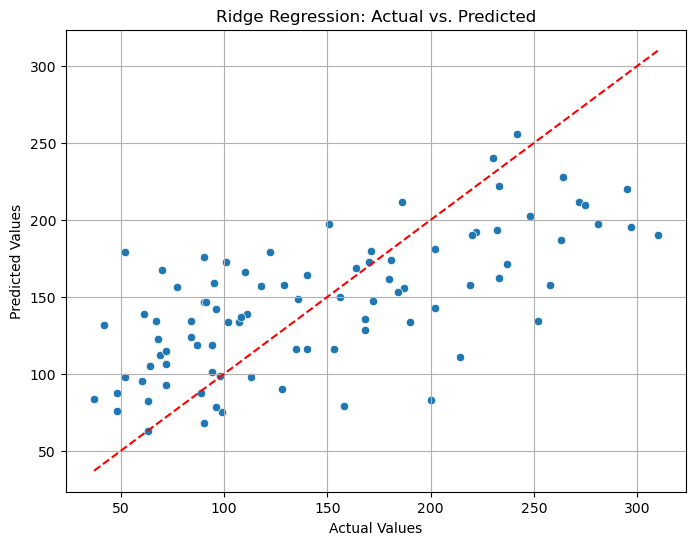

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=ridge_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs. Predicted")
plt.grid(True)
plt.show()


In [201]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)

In [ ]:
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)

print(f'Lasso Mean Squared Error (MSE): {lasso_mse:.2f}')
print(f'Lasso Root Mean Squared Error (RMSE): {lasso_rmse:.2f}')
print(f'Lasso R-squared ($R^2$): {lasso_r2:.2f}')
print(f'Lasso Mean Absolute Error (MAE): {lasso_mae:.2f}')

Lasso Mean Squared Error (MSE): 3403.58
Lasso Root Mean Squared Error (RMSE): 58.34
Lasso R-squared ($R^2$): 0.36
Lasso Mean Absolute Error (MAE): 49.73
